<a href="https://colab.research.google.com/github/WRDelta/PCA/blob/main/PCA_Seguranca_Baixada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Carregar o dataset
df = pd.read_csv('/content/Dados_Baixada.csv', encoding='latin-1') # Try 'latin-1' encoding

In [ ]:
# Converter vírgulas para pontos nos valores de latitude e longitude
df['LATITUDE'] = df['LATITUDE'].str.replace(',', '.').astype(float)
df['LONGITUDE'] = df['LONGITUDE'].str.replace(',', '.').astype(float)

In [ ]:
# Selecionar as colunas relevantes (latitude e longitude) e remover valores nulos
numerical_data = df[['LATITUDE', 'LONGITUDE']].dropna()

In [ ]:
# Padronizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [ ]:
# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [ ]:
# Adicionar a coluna 'NATUREZA_APURADA' ao dataframe de PCA para plotagem
pca_data = pd.concat([pca_data, df['NATUREZA_APURADA'].reset_index(drop=True)], axis=1)

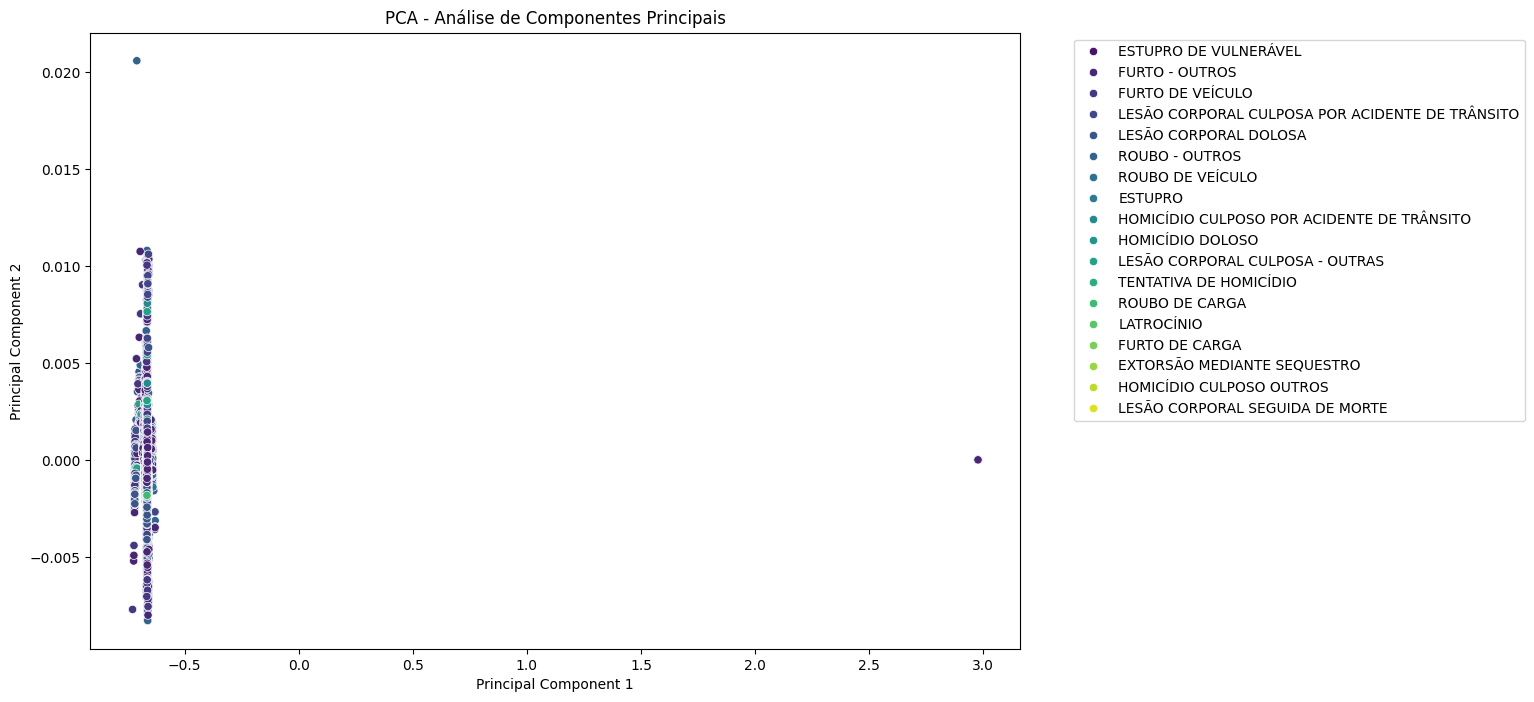

In [ ]:
# Plotagem do resultado da PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_data, x='Principal Component 1', y='Principal Component 2', hue='NATUREZA_APURADA', palette='viridis')

plt.title('PCA - Análise de Componentes Principais')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Posicionar a legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
# Informações sobre PCA
explained_variance = pca.explained_variance_ratio_
cov_matrix = pca.get_covariance()
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

In [ ]:
print("Variância explicada pelos componentes principais:", explained_variance)
print("Matriz de Covariância:", cov_matrix)
print("Autovalores:", eigenvalues)
print("Autovetores:", eigenvectors)

Variância explicada pelos componentes principais: [9.99995751e-01 4.24877888e-06]
Matriz de Covariância: [[1.00008163 1.00007313]
 [1.00007313 1.00008163]]
Autovalores: [2.00015475e+00 8.49825139e-06]
Autovetores: [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
